In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
path = 'MODELS/'
model_name = 'Model_10_01_Matern'

In [6]:
test = pd.read_csv(path + model_name + '/testset.csv')
train = pd.read_csv(path + model_name + '/trainset.csv')
full_data = pd.read_excel(path + model_name + '/full_data_10_01.xlsx')

In [7]:
full_data

,INDEX,SAMPLE_ID,SMILES,Polymer,Mn,Mw,PDI,PDI (zw),Temperature,Shear_Rate,...,mfp_MQNs38,mfp_MQNs39,mfp_MQNs40,mfp_MQNs41,mfp_MQNs42,mfp_NumAliphaticRings,mfp_NumAromaticRings,mfp_tpsa,Weight 1,Weight 2
0,0,1.0,[*]CC([*])C,poly(prop-1-ene),2600.000000,3900.0,1.50,NaN,200.0,0.000000,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
1,1,1.0,[*]CC([*])C,poly(prop-1-ene),7834.101382,17000.0,2.17,NaN,200.0,0.000000,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
2,2,1.0,[*]CC([*])C,poly(prop-1-ene),31981.981982,71000.0,2.22,NaN,200.0,0.000000,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
3,3,1.0,[*]CC([*])C,poly(prop-1-ene),43829.787234,103000.0,2.35,NaN,200.0,0.000000,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
4,4,1.0,[*]CC([*])C,poly(prop-1-ene),75757.575758,250000.0,3.30,NaN,200.0,0.000000,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,798,NaN,"[*]CC([*])CC(C)C, [*]CC([*])CCCCCCCC","poly(4-methyl-1-pentene), poly(1-decene)",36900.000000,290000.0,7.80,NaN,270.0,127.110975,...,0,0,0,0,0,0,0.0,NaN,0.968,0.032
799,799,NaN,"[*]CC([*])CC(C)C, [*]CC([*])CCCCCCCC","poly(4-methyl-1-pentene), poly(1-decene)",36900.000000,290000.0,7.80,NaN,270.0,218.512944,...,0,0,0,0,0,0,0.0,NaN,0.968,0.032
800,800,NaN,"[*]CC([*])CC(C)C, [*]CC([*])CCCCCCCC","poly(4-methyl-1-pentene), poly(1-decene)",36900.000000,290000.0,7.80,NaN,270.0,337.064071,...,0,0,0,0,0,0,0.0,NaN,0.968,0.032
801,801,NaN,"[*]CC([*])CC(C)C, [*]CC([*])CCCCCCCC","poly(4-methyl-1-pentene), poly(1-decene)",36900.000000,290000.0,7.80,NaN,270.0,534.210552,...,0,0,0,0,0,0,0.0,NaN,0.968,0.032


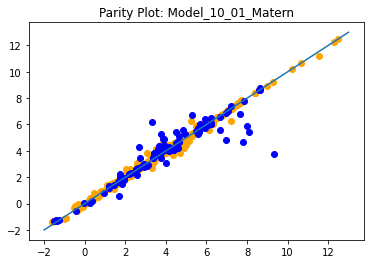

In [8]:
ax = plt.gca()
ax.set_title('Parity Plot: ' + model_name)
plt.plot([i for i in range(-2,14)], [i for i in range(-2,14)])
plt.scatter(train["Y"], train["Y_prediction"], c='orange')
plt.scatter(test["Y"], test["Y_prediction"],c='blue')

plt.title('Parity Plot: ' + model_name)
plt.savefig(path +model_name + '/' + model_name + '_parity.jpg')
plt.show()


In [9]:
test["Rel_E"] = abs(np.power(10, test["Y"]) - np.power(10,test["Y_prediction"]))/test["Y"]

In [10]:
bad_ids = test.loc[test["Rel_E"] > 1000000,"INDEX"].to_list()
full_data.loc[bad_ids, :]

,INDEX,SAMPLE_ID,SMILES,Polymer,Mn,Mw,PDI,PDI (zw),Temperature,Shear_Rate,...,mfp_MQNs38,mfp_MQNs39,mfp_MQNs40,mfp_MQNs41,mfp_MQNs42,mfp_NumAliphaticRings,mfp_NumAromaticRings,mfp_tpsa,Weight 1,Weight 2
452,452,NaN,[*]CC([*])(C)C,polyisobutylene,NaN,6.622342e+05,NaN,NaN,217.0,0.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
16,16,2.0,[*]CC([*])(C)C,polyisobutylene,1.683673e+05,3.300000e+05,1.96,1.92,25.0,0.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
42,42,7.0,[*]C[*],Linear HDPE,1.311628e+05,5.640000e+05,4.30,2.10,150.0,0.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
14,14,2.0,[*]CC([*])(C)C,polyisobutylene,2.372263e+05,3.250000e+05,1.37,1.38,25.0,0.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
87,87,10.0,[*]CC([*])(C)C,polyisobutylene,1.193548e+06,1.480000e+06,1.24,1.24,200.0,0.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
13,13,2.0,[*]CC([*])(C)C,polyisobutylene,1.145078e+05,2.210000e+05,1.93,1.84,25.0,0.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
22,22,4.0,[*]CC([*])(C)C,polyisobutylene,1.193548e+06,1.480000e+06,1.24,1.24,150.0,0.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
455,455,NaN,[*]CC([*])(C)C,polyisobutylene,NaN,1.397449e+06,NaN,NaN,217.0,0.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
442,442,NaN,[*]C=CCC[*],polybutadiene,NaN,3.069114e+04,NaN,NaN,25.0,0.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN
20,20,4.0,[*]CC([*])(C)C,polyisobutylene,5.730769e+05,7.450000e+05,1.30,1.27,150.0,0.0,...,0,0,0,0,0,0,0.0,0.0,NaN,NaN


In [121]:
worst = test.loc[test["Rel_E"] > 1000000,"INDEX"].to_list()

In [122]:
test.loc[test["INDEX"].isin(bad_ids), :]

,INDEX,Y,Y_prediction,Y_uncertainties,Mw,Temperature,Shear_Rate,mfp_Chi0n,mfp_Chi0v,mfp_Chi1n,...,efp_fam_polyamides,efp_fam_single,efp_main_chain_rel,efp_main_chain_ring,efp_norm_mol_wt,efp_numatoms_none_H,efp_ring,efp_ring_dist_shortest,efp_side_chain_abs,Rel_E
4,87,7.212188,7.603186e+00,1.209222,1.480000e+06,200.0,0.0,0.833333,0.166667,0.416667,...,0.0,1.0,0.166667,0.0,0.389639,0.333333,0.000000,0.000000,0.000000,3.300503e+06
6,312,12.487138,1.374462e-82,5.092378,4.000000e+04,232.0,0.0,0.729897,0.259309,0.376956,...,0.0,0.0,0.294118,0.8,0.588975,0.529412,0.666667,0.333333,0.333333,2.458530e+11
10,453,7.754694,6.333913e+00,1.245663,4.558789e+05,217.0,0.0,0.833333,0.166667,0.416667,...,0.0,1.0,0.166667,0.0,0.389639,0.333333,0.000000,0.000000,0.000000,7.052235e+06
14,455,9.336670,7.664281e+00,1.376630,1.397449e+06,217.0,0.0,0.833333,0.166667,0.416667,...,0.0,1.0,0.166667,0.0,0.389639,0.333333,0.000000,0.000000,0.000000,2.275854e+08
20,13,7.974972,8.284487e+00,1.010032,2.210000e+05,25.0,0.0,0.833333,0.166667,0.416667,...,0.0,1.0,0.166667,0.0,0.389639,0.333333,0.000000,0.000000,0.000000,1.230413e+07
45,345,8.397940,8.412903e+00,1.085779,8.500000e+04,240.0,0.0,0.651375,0.352062,0.339576,...,0.0,0.0,0.416667,0.8,0.806458,0.666667,0.750000,0.333333,0.000000,1.043536e+06
46,342,7.204120,6.189327e+00,1.001157,1.860000e+04,240.0,0.0,0.651375,0.352062,0.339576,...,0.0,0.0,0.416667,0.8,0.806458,0.666667,0.750000,0.333333,0.000000,2.006294e+06
57,330,7.176091,6.549784e+00,0.987363,2.820000e+04,221.2,0.0,0.651375,0.352062,0.339576,...,0.0,0.0,0.416667,0.8,0.806458,0.666667,0.750000,0.333333,0.000000,1.596082e+06
72,213,7.765957,7.373635e+00,1.036247,5.640000e+05,150.0,0.0,0.833333,0.166667,0.416667,...,0.0,1.0,0.333333,0.0,0.389639,0.333333,0.000000,0.000000,0.000000,4.468149e+06


In [20]:
params = pd.read_csv(path + model_name + '/parameters.csv')

In [21]:
[params["rmse_test"].values[0], params["rmse_train"].values[0]]

[2.0986961121392023, 0.4558662776359856]